# Mine scripts til at oprette databasen FanzyBooks.
Oprettelse af databasen. Jeg har oprettet den på Azure Sql Server
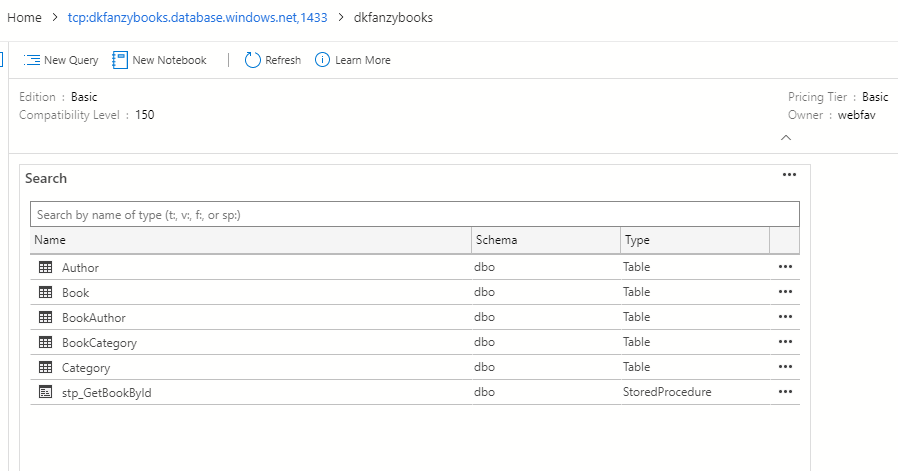
  
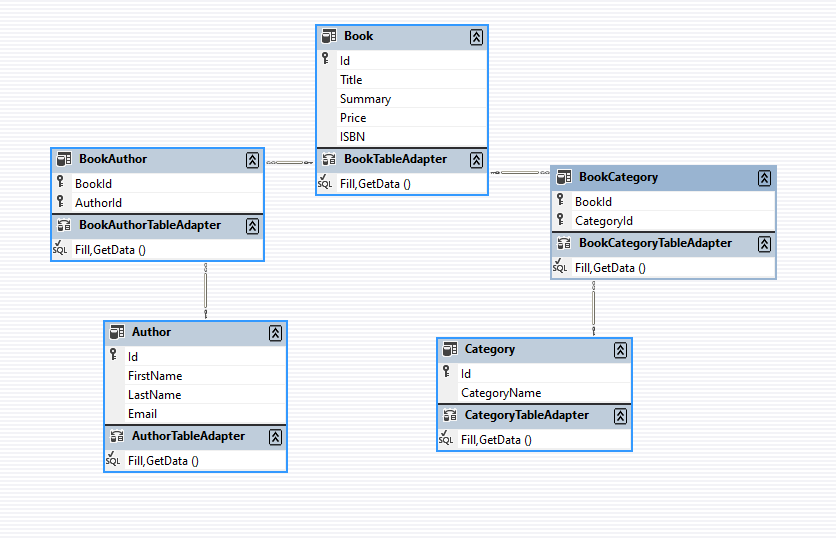

# Oprettelse af script til Book-tabellen

In [ ]:
--Drop the table if it already exists
IF OBJECT_ID('[dbo].[Book]', 'U') IS NOT NULL
DROP TABLE [dbo].[Book]


-- Create the table in the specified schema

CREATE TABLE [dbo].[Book]
(
    [Id] INT NOT NULL PRIMARY KEY IDENTITY(1,1), -- Primary Key column
    [Title] NVARCHAR(70),
    [Summary] NVARCHAR(300),
    [Price] DECIMAL (10,2),
    [ISBN] NVARCHAR(50) NOT NULL UNIQUE,
);

# Oprettelse af script til Author-tabellen

In [ ]:
--Drop the table if it already exists
IF OBJECT_ID('[dbo].[Author]', 'U') IS NOT NULL
DROP TABLE [dbo].[Author]

CREATE TABLE [dbo].[Author]
(
    [Id] INT NOT NULL PRIMARY KEY IDENTITY(1,1), -- Primary Key column
    [FirstName] NVARCHAR(50),
    [LastName] NVARCHAR(50),
    [Email] NVARCHAR(50) UNIQUE,
);

# Oprettelse af script til Category-tabellen

In [ ]:
-- Create a new table called '[Category]' in schema '[dbo]'
-- Drop the table if it already exists
IF OBJECT_ID('[dbo].[Category]', 'U') IS NOT NULL
DROP TABLE [dbo].[Category]
GO
-- Create the table in the specified schema
CREATE TABLE [dbo].[Category]
(
    [Id] INT NOT NULL PRIMARY KEY IDENTITY(1,1), -- Primary Key column
    [CategoryName] NVARCHAR(70) NOT NULL, 
);
GO

# Oprettelse af Junction tabellen BookAuthor

In [ ]:
-- Create a new table called '[BookAuthor]' in schema '[dbo]'
-- Drop the table if it already exists
IF OBJECT_ID('[dbo].[BookAuthor]', 'U') IS NOT NULL
DROP TABLE [dbo].[BookAuthor]
GO
-- Create the table in the specified schema
CREATE TABLE [dbo].[BookAuthor]
(
    [BookId] INT NOT NULL,
    [AuthorId] INT NOT NULL,
    PRIMARY KEY (BookId, AuthorId),
    FOREIGN KEY (BookId) REFERENCES Book(Id),
    FOREIGN KEY (AuthorId) REFERENCES Author(Id)
);
GO

# Oprettelse af Junction tabellen BookCategory

In [ ]:
-- Create a new table called '[BookCategory]' in schema '[dbo]'
-- Drop the table if it already exists
IF OBJECT_ID('[dbo].[BookCategory]', 'U') IS NOT NULL
DROP TABLE [dbo].[BookCategory]
GO
-- Create the table in the specified schema
CREATE TABLE [dbo].[BookCategory]
(
    [BookId] INT NOT NULL,
    [CategoryId] INT NOT NULL,
    PRIMARY KEY (BookId, CategoryId),
    FOREIGN KEY (BookId) REFERENCES Book(Id),
    FOREIGN KEY (CategoryId) REFERENCES Category(Id)
);
GO

# Indsættelse af data i tabellen Book

In [ ]:
USE dkfanzybooks
INSERT INTO [dbo].[Book](
	[Title],
	[Summary],
	[Price],
	[ISBN] 
) 
VALUES 
(
    'Italiensk Mad', 
    'Det italienske køkken byder på nogle af verdens mest elskede retter. Pizza, pasta og lasagne er eksempler på klassikere, der altid går lige i hjertet på store som små!',
    199.95, 
    '9788711534984'
),
(
    'Dansk Mad', 
    'Lorem ipsum dolor sit amet, consectetur adipiscing elit.',
    159.95, 
    '97997115349875'
),
(
    'Fransk Mad', 
    'Quisque ipsum risus, fermentum sed magna eu, mattis tempus eros',
    189.55, 
    '87997112349715'
),
(
    'Græsk Mad', 
    'Vestibulum condimentum est vel ipsum vehicula ullamcorper',
    89.50, 
    '57967112749714'
),
(
    'Indisk Mad', 
    'Mauris mi elit, tincidunt et neque quis, dignissim congue nisl',
    135.50, 
    '37667562748714'
),
(
    'Vegetarretter', 
    'Destibulum condimentum est vel ipsum vehicula ullamcorper',
    199.95, 
    '6773741532987'
),
(
    'Nat og dag', 
    'Lorem ipsum dolor sit amet, consectetur adipiscing elit.',
    99.95, 
    '32648951238756'
),
(
    'Ud og ind', 
    'Quisque ipsum risus, fermentum sed magna eu, mattis tempus eros',
    139.00, 
    '986537568941358'
),
(
    'Hvid og sort', 
    'Vestibulum condimentum est vel ipsum vehicula ullamcorper',
    89.50, 
    '65874359284613'
),
(
    'Før og efter', 
    'Mauris mi elit, tincidunt et neque quis, dignissim congue nisl',
    135.50, 
    '346598265741258'
);

GO

# Indsættelse af data i tabellen Author

In [ ]:
USE dkfanzybooks
INSERT INTO [dbo].[Author](
	[FirstName],
	[LastName],
	[Email]	
) 
VALUES 
(
    'Claus', 
    'Meyer', 
    'meyer@sletmig.dk'
),
(
    'Jamie', 
    'Oliver', 
    'J_oliver@sletmig.dk'
),
(
    'Nikolaj', 
    'Kirk', 
    'niko_kirk@sletmig.dk'
),
(
    'Mette', 
    'Blomsterberg', 
    'blommeberg@sletmig.dk'
),
(
    'Mads', 
    'Hansen', 
    'm_hansen@sletmig.dk'
),
(
    'Jussi', 
    'Adler-Olsen', 
    'adler-olsen@sletmig.dk'
),
(
    'Anna', 
    'Grue', 
    'grue@sletmig.dk'
),
(
    'Erik', 
    'Amdrup', 
    'amdrup@sletmig.dk'
);

GO

# Indsættelse af data i tabellen BookAuthor

In [ ]:
USE dkfanzybooks
INSERT INTO [dbo].[BookAuthor](
	[BookId],
	[AuthorId]
) 
VALUES 
(1, 1),
(1, 2),
(2, 3),
(3, 4),
(4, 5),
(4, 6),
(5, 7),
(5, 8),
(6, 3),
(6, 4),
(7, 8),
(7, 5),
(8, 5),
(8, 6),
(9, 7),
(10, 8);
GO

# Indsættelse af data i tabellen BookCategory

In [ ]:
USE dkfanzybooks
INSERT INTO [dbo].[BookCategory](
	[BookId],
	[CategoryId]
) 
VALUES 
(1, 1),
(2, 1),
(3, 1),
(4, 8),
(5, 7),
(6, 2),
(7, 3),
(8, 4),
(9, 5),
(10, 6);
GO

# Query til Join-tabeller

In [1]:
SELECT Book.Id AS BookId, Author.Id AS AuthorId, Category.Id AS CategoryId, Title, CategoryName, FirstName, LastName, Summary, ISBN
FROM [dbo].[Book]
LEFT OUTER JOIN BookAuthor ON Book.Id = BookAuthor.BookId
LEFT OUTER JOIN Author ON Author.Id = BookAuthor. AuthorId
LEFT OUTER JOIN BookCategory ON Book.Id = BookCategory.BookId
LEFT OUTER JOIN Category ON Category.Id = BookCategory. CategoryId
ORDER BY BookId;
GO


(16 rows affected)

Total execution time: 00:00:00.105

BookId,AuthorId,CategoryId,Title,CategoryName,FirstName,LastName,Summary,ISBN
1,1,1,Italiensk Mad,Kogebog,Claus,Meyer,"Det italienske køkken byder på nogle af verdens mest elskede retter. Pizza, pasta og lasagne er eksempler på klassikere, der altid går lige i hjertet på store som små!",9788711534984
1,2,1,Italiensk Mad,Kogebog,Jamie,Oliver,"Det italienske køkken byder på nogle af verdens mest elskede retter. Pizza, pasta og lasagne er eksempler på klassikere, der altid går lige i hjertet på store som små!",9788711534984
2,3,1,Dansk Mad,Kogebog,Nikolaj,Kirk,"Lorem ipsum dolor sit amet, consectetur adipiscing elit.",97997115349875
3,4,1,Fransk Mad,Kogebog,Mette,Blomsterberg,"Quisque ipsum risus, fermentum sed magna eu, mattis tempus eros",87997112349715
4,5,8,Græsk Mad,Børnebog,Mads,Hansen,Vestibulum condimentum est vel ipsum vehicula ullamcorper,57967112749714
4,6,8,Græsk Mad,Børnebog,Jussi,Adler-Olsen,Vestibulum condimentum est vel ipsum vehicula ullamcorper,57967112749714
5,7,7,Indisk Mad,Sangbog,Anna,Grue,"Mauris mi elit, tincidunt et neque quis, dignissim congue nisl",37667562748714
5,8,7,Indisk Mad,Sangbog,Erik,Amdrup,"Mauris mi elit, tincidunt et neque quis, dignissim congue nisl",37667562748714
6,3,2,Vegetarretter,Krimi,Nikolaj,Kirk,Destibulum condimentum est vel ipsum vehicula ullamcorper,6773741532987
6,4,2,Vegetarretter,Krimi,Mette,Blomsterberg,Destibulum condimentum est vel ipsum vehicula ullamcorper,6773741532987


Her er en anden query til at vise samme resultat.

In [ ]:
SELECT Book.Id AS BookId, Author.Id AS AuthorId, Category.Id AS CategoryId, Title, CategoryName, FirstName, LastName, Summary, ISBN
FROM Book, BookAuthor, Author, BookCategory, Category
WHERE Book.Id = BookAuthor.BookId
AND Author.Id = BookAuthor. AuthorId
AND Book.Id = BookCategory.BookId
AND Category.Id = BookCategory. CategoryId
ORDER BY BookId;
GO

# Query til søge efter en bestemt bog

In [3]:
    SELECT Book.Id AS BookId, Author.Id AS AuthorId, Title, FirstName, LastName, Summary, ISBN
    FROM [dbo].[Book]
    LEFT JOIN BookAuthor
    ON Book.Id = BookAuthor.BookId
    LEFT JOIN Author
    ON Author.Id = BookAuthor. AuthorId
    WHERE book.Id = 2

(1 row affected)

Total execution time: 00:00:00.066

BookId,AuthorId,Title,FirstName,LastName,Summary,ISBN
2,3,Dansk Mad,Nikolaj,Kirk,"Lorem ipsum dolor sit amet, consectetur adipiscing elit.",97997115349875


# Stored procedure

In [ ]:
-- Create a new stored procedure called 'stp_GetBookById' in schema 'dbo'
-- Drop the stored procedure if it already exists
IF EXISTS (
SELECT *
    FROM INFORMATION_SCHEMA.ROUTINES
WHERE SPECIFIC_SCHEMA = N'dbo'
    AND SPECIFIC_NAME = N'stp_GetBookById'
    AND ROUTINE_TYPE = N'PROCEDURE'
)
DROP PROCEDURE dbo.stp_GetBookById
GO
-- Create the stored procedure in the specified schema
CREATE PROCEDURE dbo.stp_GetBookById
@bookId int
AS
BEGIN
    -- body of the stored procedure
    SELECT Id, Title, Summary, ISBN
    FROM [dbo].[Book]
    WHERE Id = @bookId
END
GO
-- example to execute the stored procedure we just created
EXECUTE dbo.stp_GetBookById
GO

# Reseed Identity

In [ ]:
-- Check what the current identify value is. 
  DBCC CHECKIDENT (Book, NORESEED)

--This SQL statement deletes all rows in the "Book" table, without deleting the table:
  DELETE FROM Book;

--To RESEED value to 0:
  DBCC CHECKIDENT (Book, RESEED, 0)

# Mine overvejelser
Jeg kunne ikke lige finde ud af at lave en Query, hvor bøgerne kun står én gang, men med flere forfattere. Men jeg tænker heller ikke det er muligt at vise i en tabel. Jeg ville lave den som en stored procedure og så vise details af bøger med flere forfattere på et website.
Jeg  har lavet en søgning, hvor id på en bestemt bog er hard-coded ind. Jeg tænker at det er nødvendigt med en stored procedure, hvis det er en tilfældig variabel som brugeren taster ind.
Selvfølgelig rendte jeg ind i det problem med at string-feltet 'Summary' var for kort i længden i første omgang, da jeg havde puttet for meget tekst ind. Så da jeg indsatte flere værdier startede tabellen fra 2 i identity. Det synes jeg ikke ser så pænt ud, så derfor lavede jeg en query med at nulstille identity (RESEED), hvor jeg først sletter alt i tabellen og derefter reseeder til 0. Derfor er den kode også med her til sidst.
Min tanke er selvfølgelig også at lave en simpel webside på Azure, hvor man kan søge efter bøgerne.